## Product Portfolio Management and Bubble chart   

### Import libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Parameters

In [65]:
%config InlineBackend.figure_formats = {'png', 'retina'}  # for high-reso graph
plt.rcParams['font.family'] = 'Yu Mincho' # for Japanese in graph (Win10)

csv_in = 'ppm.csv'

### Read CSV file

In [66]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=3, header=0)
print(df.shape)
print(df.info())
display(df.head())

(4, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
Field               4 non-null object
Sales(BY)           4 non-null float64
Share(%)            4 non-null float64
Top/2nd_Share(%)    4 non-null float64
Growth_Ratio(%)     4 non-null float64
dtypes: float64(4), object(1)
memory usage: 240.0+ bytes
None


,Field,Sales(BY),Share(%),Top/2nd_Share(%),Growth_Ratio(%)
0,Convenient_Store,4678.0,36.8,28.2,2.5
1,E-commerce,108.8,2.1,27.6,9.0
2,Department_Store,674.4,11.4,16.6,-1.1
3,Bank,127.7,0.7,23.6,0.3


### Calculation of relative share  
相対シェアの計算  

In [67]:
df['relative_share'] = df['Share(%)'] / df['Top/2nd_Share(%)']

### Calculation of relative sales  
相対売上高の計算  

In [68]:
df['relative_sales'] = df['Sales(BY)'] / df['Sales(BY)'].max()

### Calculation of radius  
円の面積比が相対売上高と一致するように半径を決める  
(つまり相対売上高の平方根を円の半径とする)  

In [69]:
df['radius'] = np.sqrt(df['relative_sales']) * 2000.0

### Bubble chart  

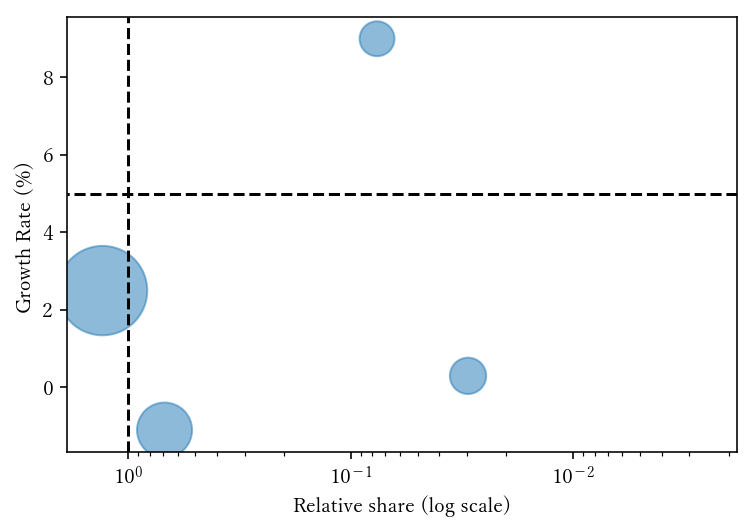

In [75]:
plt.scatter(df['relative_share'], df['Growth_Ratio(%)'], s=df['radius'], alpha=0.5)
plt.xlabel('Relative share (log scale)')
plt.ylabel('Growth Rate (%)')
plt.xscale('log')
(xmin,xmax,ymin,ymax) = plt.axis()
plt.xlim(xmax, xmin)
plt.ylim(ymin, ymax)
plt.hlines([5], xmin, xmax, linestyle='dashed')
plt.vlines([1], ymin, ymax, linestyle='dashed')
plt.show()